In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/chagasrennan/Python-stuff/master/LogisticReg/mice_data.csv')

In [77]:
df.head()

,Diet,Bodyweight,Size
0,chow,21.51,14.54
1,chow,28.14,19.86
2,chow,24.04,17.17
3,chow,23.45,19.11
4,chow,23.68,16.73


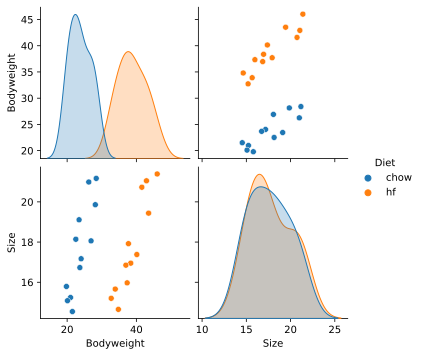

In [78]:
sns.pairplot(df, hue='Diet')

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df.Bodyweight.values.reshape(-1, 1), df.Size.values)

LinearRegression()

In [80]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('coefficient of determination:', model.score(df.Bodyweight.values.reshape(-1, 1), df.Size.values))


intercept: 14.404963694178027
slope: [0.10555206]
coefficient of determination: 0.15370183871965704


<AxesSubplot:xlabel='Bodyweight', ylabel='Size'>

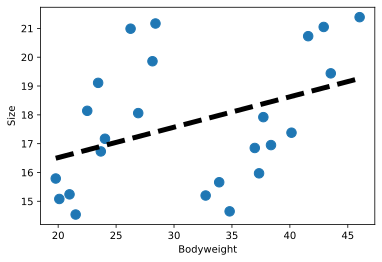

In [81]:
fig, ax = plt.subplots()

x = np.linspace(df.Bodyweight.min(), df.Bodyweight.max())
y = model.coef_*x + model.intercept_

ax.plot(x,y, 'k--', linewidth=5)
df.plot(kind='scatter', x='Bodyweight',y='Size', s=90,ax=ax)

<AxesSubplot:xlabel='Bodyweight', ylabel='Diet'>

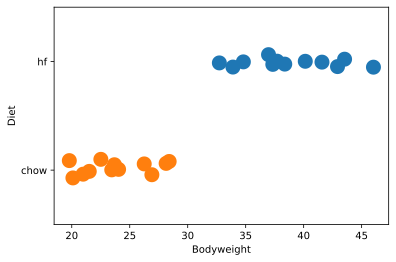

In [82]:
sns.stripplot(x='Bodyweight', y='Diet', data=df.sort_values(by='Diet', ascending=False), s=15)

<AxesSubplot:xlabel='Bodyweight', ylabel='Diet'>

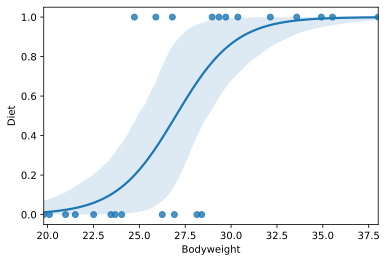

In [93]:
aux = df.copy()
aux.Bodyweight = aux.Bodyweight - 8*aux.Diet.map({'hf':1,'chow':0})
aux.Diet = aux.Diet.map({'hf':1,'chow':0})

sns.regplot(x='Bodyweight', y='Diet', data=aux, logistic=True)

# sns.stripplot(x='Bodyweight', y='Diet', data=aux.sort_values(by='Diet', ascending=False), s=15)

In [94]:
# df.Bodyweight = df.Bodyweight + 3*df.Diet.map({'hf':1,'chow':0})

df.to_csv('dat.csv',index=False)